# LEVEL1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")

print("Shape:", df.shape)  
df.info()  
df.head()


Shape: (9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Swi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Count of missing values in each column

In [16]:
df.isnull().sum()

# Option 1: Drop rows with missing 'Cuisines'
# df = df.dropna(subset=['Cuisines'])

# Option 2: Fill missing 'Cuisines' with 'Unknown'
df.fillna({'Cuisines': 'Unknown'}, inplace=True)

df['Cuisines'].isnull().sum()

df[df['Cuisines'] == 'Unknown'].head()



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


### Check Data types

In [17]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## Aggregate Ratings

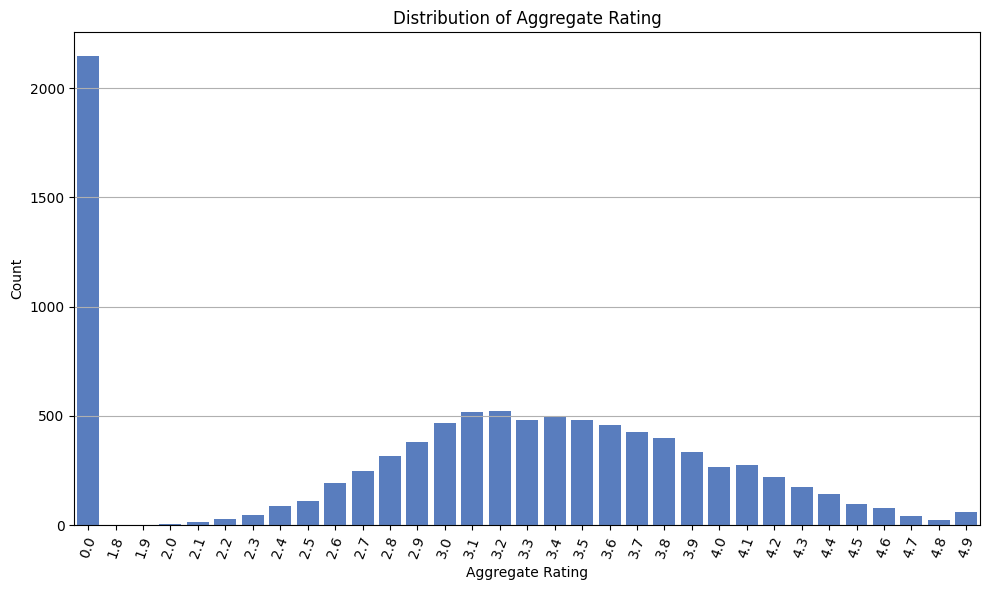

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-muted')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Aggregate rating', order=sorted(df['Aggregate rating'].unique()))
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Statistical Measures

In [25]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [26]:
# Median for all numerical columns
df.median(numeric_only=True)

# Standard deviation
df.std(numeric_only=True)


Restaurant ID           8.791521e+06
Country Code            5.675055e+01
Longitude               4.146706e+01
Latitude                1.100794e+01
Average Cost for two    1.612118e+04
Price range             9.056088e-01
Aggregate rating        1.516378e+00
Votes                   4.301691e+02
dtype: float64

### Country code

In [27]:
df['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

### City

In [28]:
df['City'].value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

### Cuisines

In [29]:
df['Cuisines'].value_counts()

Cuisines
North Indian                       936
North Indian, Chinese              511
Chinese                            354
Fast Food                          354
North Indian, Mughlai              334
                                  ... 
Kebab, Izgara                        1
World Cuisine                        1
World Cuisine, Mexican, Italian      1
Kebab, Turkish Pizza, D�_ner         1
Turkish Pizza                        1
Name: count, Length: 1825, dtype: int64

## Top Cuisines and Cities with the Most Restaurants

### Top 10 Cities

In [30]:
top_cities = df['City'].value_counts().head(10)
print(top_cities)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


### Top 10 Cuisines

In [31]:
top_cuisines = df['Cuisines'].value_counts().head(10)
print(top_cuisines)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


### Bar plot for top cities

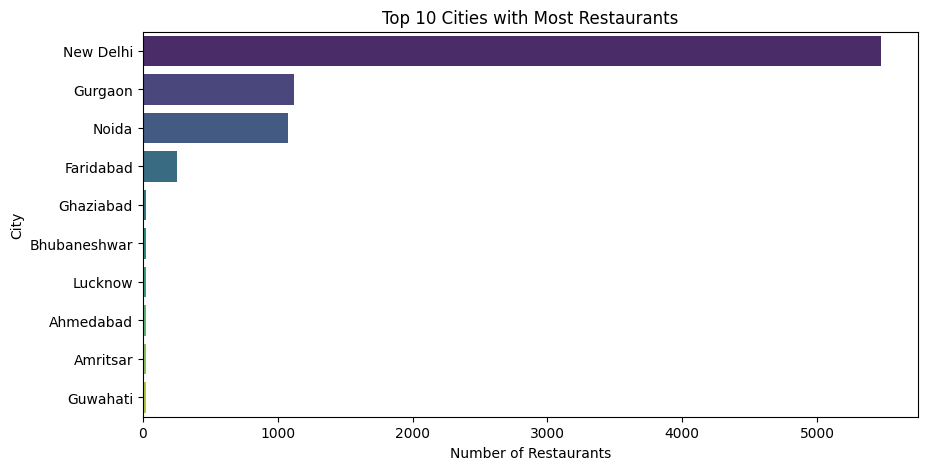

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from top_cities so we can use it with hue
top_cities_df = top_cities.reset_index()
top_cities_df.columns = ['City', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=top_cities_df, x='Count', y='City', hue='City', palette='viridis', legend=False)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()



### Bar plot for top cuisines

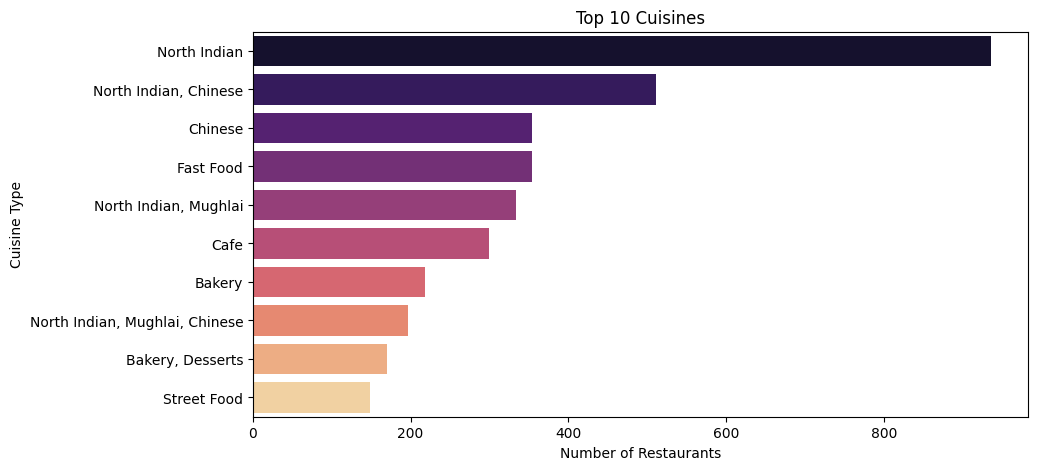

In [35]:
# Convert top_cuisines into a DataFrame
top_cuisines_df = top_cuisines.reset_index()
top_cuisines_df.columns = ['Cuisine', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=top_cuisines_df, x='Count', y='Cuisine', hue='Cuisine', palette='magma', legend=False)
plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()

## Location Plot

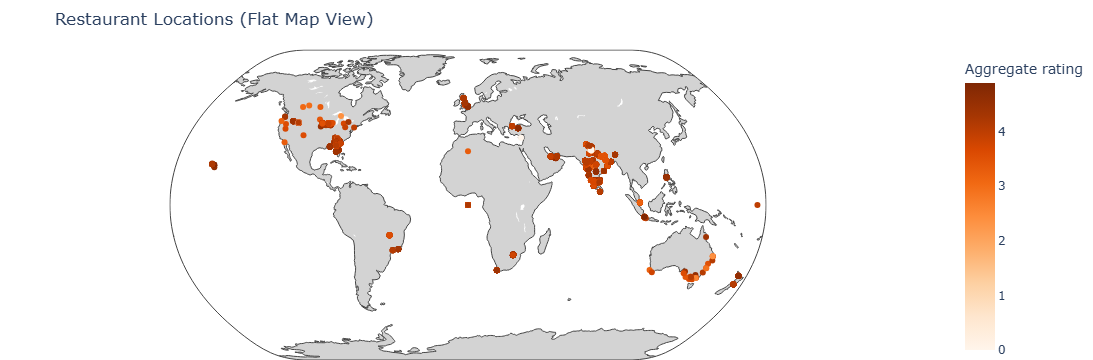

In [ ]:
import plotly.express as px

# Drop missing values in Latitude and Longitude
df_clean = df.dropna(subset=['Latitude', 'Longitude'])

# Plot on flat map using 'scatter_geo'
fig = px.scatter_geo(df_clean,
                     lat='Latitude',
                     lon='Longitude',
                     color='Aggregate rating',
                     hover_name='Restaurant Name',
                     title='Restaurant Locations (Flat Map View)',
                     color_continuous_scale='Oranges')

#  Change to flat map (2D projection)
fig.update_geos(
    projection_type="natural earth",  # Try 'equirectangular', 'mercator', or 'flat earth' styles
    showland=True,
    landcolor="lightgrey"
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()



### Top Cities with Most Restaurants

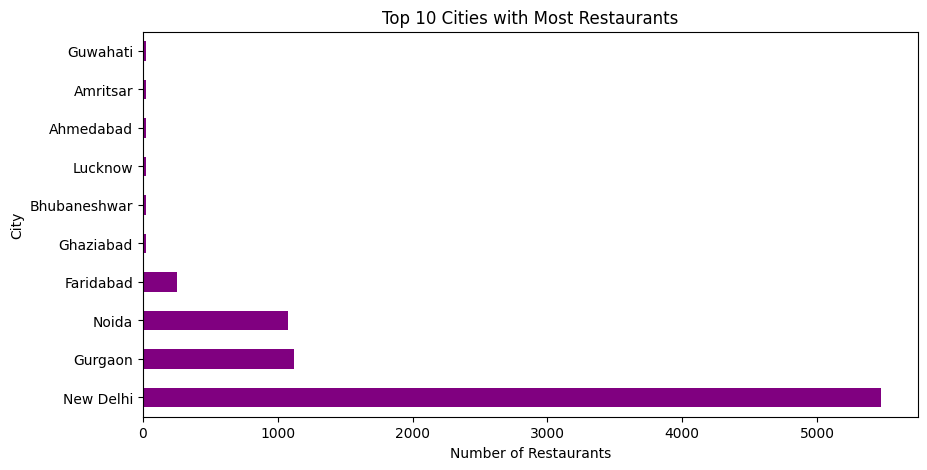

In [20]:
import matplotlib.pyplot as plt

city_counts = df['City'].value_counts().head(10)
city_counts.plot(kind='barh', figsize=(10,5), color='purple')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

### Average Rating by City

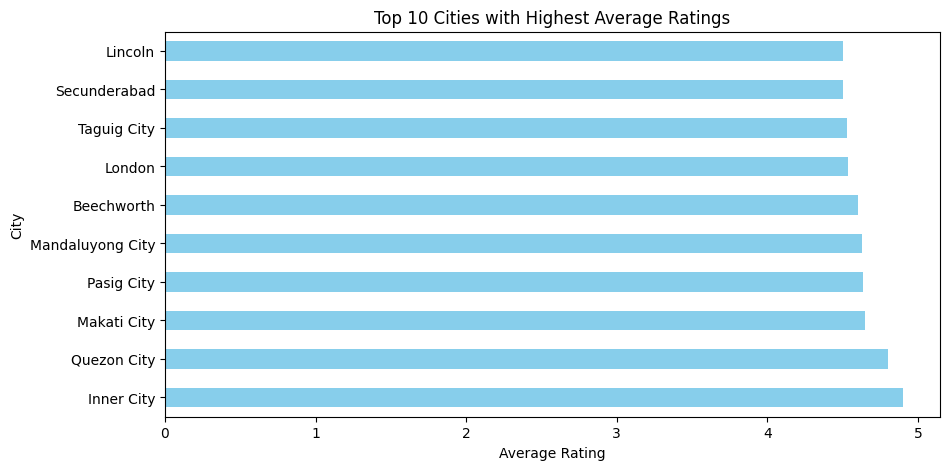

In [19]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
city_avg_rating.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title("Top 10 Cities with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()
